In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sbn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from math import ceil
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone
import scipy.stats as scs
import statsmodels.api as sm




from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [6]:
data = pd.read_csv('~/Downloads/Region_Mobility_Report_CSVs/2020_US_Region_Mobility_Report.csv')

/Users/cp/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
data.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0


In [9]:
data.shape


(989260, 15)

In [14]:
data.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'place_id', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989260 entries, 0 to 989259
Data columns (total 15 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 989260 non-null  object 
 1   country_region                                      989260 non-null  object 
 2   sub_region_1                                        988871 non-null  object 
 3   sub_region_2                                        969032 non-null  object 
 4   metro_area                                          0 non-null       float64
 5   iso_3166_2_code                                     19839 non-null   object 
 6   census_fips_code                                    969421 non-null  float64
 7   place_id                                            989260 non-null  object 
 8   date                                                989260 non-n

In [15]:
data.describe()

,metro_area,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,0.0,969421.000000,655375.000000,593040.000000,246024.000000,379604.000000,962562.000000,541430.000000
mean,NaN,30356.257923,-10.933731,-0.281994,20.040805,-13.596564,-22.943940,7.985187
std,NaN,15298.690076,19.342239,15.029727,59.617532,26.032873,15.104474,5.950686
min,NaN,1001.000000,-100.000000,-96.000000,-95.000000,-93.000000,-94.000000,-46.000000
25%,NaN,18105.000000,-21.000000,-9.000000,-19.000000,-32.000000,-31.000000,4.000000
50%,NaN,29113.000000,-10.000000,-1.000000,6.000000,-12.000000,-22.000000,7.000000
75%,NaN,45051.000000,1.000000,7.000000,44.000000,4.000000,-14.000000,11.000000
max,NaN,56045.000000,261.000000,225.000000,709.000000,274.000000,66.000000,46.000000


In [16]:
data.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,US,United States,NaN,NaN,NaN,NaN,NaN,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0


array([[<AxesSubplot:title={'center':'metro_area'}>,
        <AxesSubplot:title={'center':'census_fips_code'}>,
        <AxesSubplot:title={'center':'retail_and_recreation_percent_change_from_baseline'}>],
       [<AxesSubplot:title={'center':'grocery_and_pharmacy_percent_change_from_baseline'}>,
        <AxesSubplot:title={'center':'parks_percent_change_from_baseline'}>,
        <AxesSubplot:title={'center':'transit_stations_percent_change_from_baseline'}>],
       [<AxesSubplot:title={'center':'workplaces_percent_change_from_baseline'}>,
        <AxesSubplot:title={'center':'residential_percent_change_from_baseline'}>,
        <AxesSubplot:>]], dtype=object)

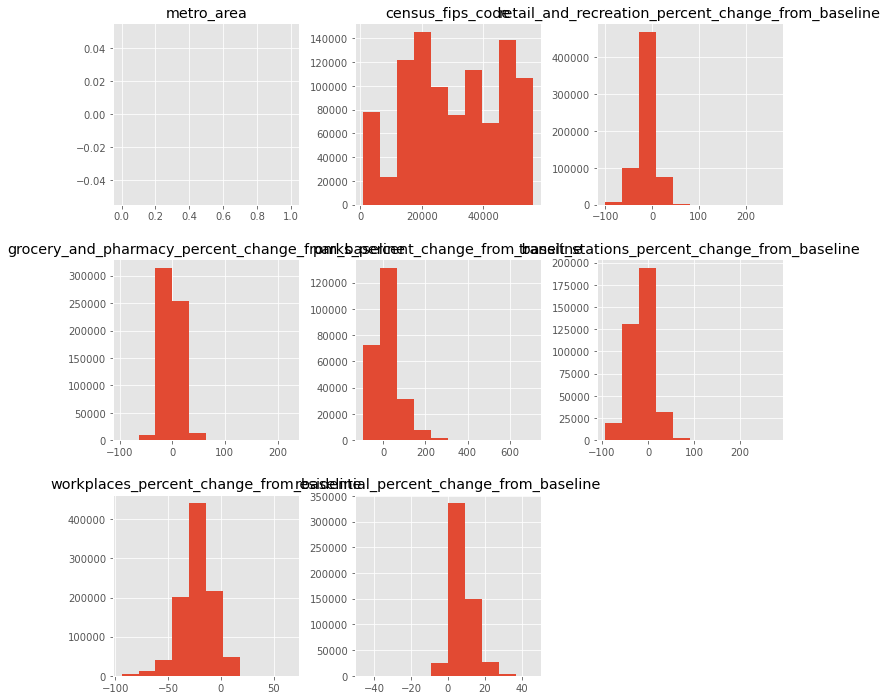

In [20]:
data.hist(figsize=(12,12))

In [22]:
sampling = data.sample(n=100)
sampling.head()
sampling.shape

(100, 15)

In [23]:
from bs4 import BeautifulSoup


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989260 entries, 0 to 989259
Data columns (total 15 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 989260 non-null  object 
 1   country_region                                      989260 non-null  object 
 2   sub_region_1                                        988871 non-null  object 
 3   sub_region_2                                        969032 non-null  object 
 4   metro_area                                          0 non-null       float64
 5   iso_3166_2_code                                     19839 non-null   object 
 6   census_fips_code                                    969421 non-null  float64
 7   place_id                                            989260 non-null  object 
 8   date                                                989260 non-n